<h2>Importing modules required for running the code</h2>

In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout,Flatten
from keras.layers import BatchNormalization


Using TensorFlow backend.
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

<h2>Columns Name for our testing and training data </h2>

In [2]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

<h2> Training Dataset </h2>

In [3]:
awid = pd.read_csv("AWID-CLS-R-Trn", header=None, names=features)

C:\Users\Naresh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2> Data Exploration</h2>

In [4]:
awid.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal


In [5]:
awid.describe()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,radiotap.datarate,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order
count,1795575.0,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0,1795575.0,...,1.795575e+06,1795575.0,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1.795575e+06,1795575.0
mean,0.0,0.0,1.393663e+09,2.004690e-03,2.004690e-03,1.870294e+03,5.153149e+02,5.153149e+02,0.0,0.0,...,2.513950e+01,0.0,1.272582e+00,8.499055e+00,3.748103e-04,1.271080e-01,2.325216e-02,1.772691e-03,4.932927e-01,0.0
std,0.0,0.0,8.674448e+02,6.379536e-03,6.379536e-03,8.674448e+02,6.649245e+02,6.649245e+02,0.0,0.0,...,2.373590e+01,0.0,8.198060e-01,4.173015e+00,1.935639e-02,3.330940e-01,1.507034e-01,4.206602e-02,4.999551e-01,0.0
min,0.0,0.0,1.393661e+09,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.0,0.0,1.393662e+09,3.150000e-04,3.150000e-04,1.027875e+03,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.0,0.0,1.393663e+09,5.490000e-04,5.490000e-04,1.902614e+03,1.120000e+02,1.120000e+02,0.0,0.0,...,2.400000e+01,0.0,2.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,0.0,0.0,1.393664e+09,1.113000e-03,1.113000e-03,2.524325e+03,1.552000e+03,1.552000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
max,0.0,0.0,1.393665e+09,3.502630e-01,3.502630e-01,3.599571e+03,1.570000e+03,1.570000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0


In [6]:
awid['class'].value_counts()

normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: class, dtype: int64

In [7]:
awid.isna().sum()

frame.interface_id               0
frame.dlt                        0
frame.offset_shift               0
frame.time_epoch                 0
frame.time_delta                 0
                                ..
wlan.qos.bit4                    0
wlan.qos.txop_dur_req            0
wlan.qos.buf_state_indicated2    0
data.len                         0
class                            0
Length: 155, dtype: int64

<h2> Dropping columns with 50% of null data</h2>

In [8]:
awid.replace({"?":None}, inplace=True)
null_column=awid.columns[awid.isnull().mean() >= 0.51]
null_column.shape

(70,)

<h2>Dropping all the null rows</h2>

In [9]:
awid.drop(null_column, axis=1, inplace=True)
awid.dropna(inplace=True)

In [10]:
awid.isna().sum()

frame.interface_id            0
frame.offset_shift            0
frame.time_epoch              0
frame.time_delta              0
frame.time_delta_displayed    0
                             ..
wlan.seq                      0
wlan.fcs_good                 0
wlan.wep.key                  0
data.len                      0
class                         0
Length: 85, dtype: int64

In [11]:
awid['class'].value_counts()

normal           775634
injection         65379
impersonation     44731
Name: class, dtype: int64

<h2>Converting all the Columns to numeric</h2>

In [12]:
for col in awid.columns:
    awid[col]=pd.to_numeric(awid[col], errors='ignore')

In [13]:
awid.select_dtypes(['number']).head()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,wlan.duration,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len
17,0,0.0,1.393661e+09,0.002270,0.002270,0.217518,1524,1524,0,0,...,0,0,1,0,44,0,96,1,0,1460
18,0,0.0,1.393661e+09,0.000621,0.000621,0.218139,124,124,0,0,...,0,0,1,0,44,0,1217,1,0,60
20,0,0.0,1.393661e+09,0.000144,0.000144,0.229118,153,153,0,0,...,0,0,1,0,44,0,97,1,0,89
28,0,0.0,1.393661e+09,0.021711,0.021711,0.367359,124,124,0,0,...,0,0,1,0,44,0,1220,1,0,60
31,0,0.0,1.393661e+09,0.000058,0.000058,0.380933,124,124,0,0,...,0,0,1,0,44,0,99,1,0,60


<h2>Splitting the training data</h2>

In [14]:
#For the Binary Classification,we need to make class label as 'normal' and 'attack'
awid['class']= ['normal' if x == 'normal' else 'attack' for x in awid['class']]

In [15]:
X_train, y_train = awid.select_dtypes(['number']), awid['class']

In [16]:
y_train.value_counts()

normal    775634
attack    110110
Name: class, dtype: int64

<h2>Testing Data</h2>

In [17]:
awid_test = pd.read_csv("AWID-CLS-R-Tst/AWID-CLS-R-Tst", header=None, names=features)


C:\Users\Naresh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2>Cleaning testing data</h2>

In [18]:
awid_test.isna().sum()
awid_test.replace({"?":None}, inplace=True)
test_null_column=awid_test.columns[awid_test.isnull().mean() >= 0.5]
awid_test.drop(test_null_column, axis=1, inplace=True)
awid_test.dropna(inplace=True)

for col in awid_test.columns:
    awid_test[col]=pd.to_numeric(awid_test[col], errors='ignore')

awid_test['class'] = ['normal' if x == 'normal' else 'attack' for x in awid_test['class']]

X_test, y_test = awid_test.select_dtypes(['number']), awid_test['class']


In [19]:
X_test.describe()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,wlan.duration,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len
count,313248.0,313248.0,3.132480e+05,313248.000000,313248.000000,313248.000000,313248.000000,313248.000000,313248.0,313248.0,...,313248.000000,313248.000000,313248.0,313248.0,313248.000000,313248.000000,313248.000000,313248.0,313248.000000,313248.000000
mean,0.0,0.0,1.393669e+09,0.001238,0.001238,419.131540,892.088681,892.088681,0.0,0.0,...,0.000354,0.008897,1.0,0.0,80.225144,0.121674,1849.670600,1.0,0.065405,828.889611
std,0.0,0.0,3.968335e+02,0.003632,0.003632,396.833483,713.371196,713.371196,0.0,0.0,...,0.018821,0.093904,0.0,0.0,98.175003,0.522946,1158.063441,0.0,0.250803,712.901695
min,0.0,0.0,1.393668e+09,0.000000,0.000000,0.000000,65.000000,65.000000,0.0,0.0,...,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,3.000000
25%,0.0,0.0,1.393668e+09,0.000393,0.000393,74.256986,124.000000,124.000000,0.0,0.0,...,0.000000,0.000000,1.0,0.0,44.000000,0.000000,920.000000,1.0,0.000000,60.000000
50%,0.0,0.0,1.393668e+09,0.000608,0.000608,255.078000,1552.000000,1552.000000,0.0,0.0,...,0.000000,0.000000,1.0,0.0,44.000000,0.000000,1646.000000,1.0,0.000000,1488.000000
75%,0.0,0.0,1.393669e+09,0.000965,0.000965,852.944268,1552.000000,1552.000000,0.0,0.0,...,0.000000,0.000000,1.0,0.0,44.000000,0.000000,2812.000000,1.0,0.000000,1488.000000
max,0.0,0.0,1.393669e+09,0.344335,0.344335,1200.289872,1570.000000,1570.000000,0.0,0.0,...,1.000000,1.000000,1.0,0.0,314.000000,11.000000,4095.000000,1.0,3.000000,1508.000000


In [20]:
y_test.value_counts()

normal    277960
attack     35288
Name: class, dtype: int64

<h2>Preprocessing and Feature Scaling   </h2> 

In [21]:
sc=StandardScaler()
sc.fit(X_train)
scaled_X_train=sc.transform(X_train)

sc1=StandardScaler()
sc1.fit(X_test)
scaled_X_test=sc1.transform(X_test)

In [22]:
X_train

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order,wlan.duration,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len
17,0,0.0,1.393661e+09,0.002270,0.002270,0.217518,1524,1524,0,0,...,0,0,1,0,44,0,96,1,0,1460
18,0,0.0,1.393661e+09,0.000621,0.000621,0.218139,124,124,0,0,...,0,0,1,0,44,0,1217,1,0,60
20,0,0.0,1.393661e+09,0.000144,0.000144,0.229118,153,153,0,0,...,0,0,1,0,44,0,97,1,0,89
28,0,0.0,1.393661e+09,0.021711,0.021711,0.367359,124,124,0,0,...,0,0,1,0,44,0,1220,1,0,60
31,0,0.0,1.393661e+09,0.000058,0.000058,0.380933,124,124,0,0,...,0,0,1,0,44,0,99,1,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795504,0,0.0,1.393665e+09,0.015341,0.015341,3599.043342,112,112,0,0,...,0,0,1,0,48,0,2608,1,0,48
1795511,0,0.0,1.393665e+09,0.013841,0.013841,3599.086311,112,112,0,0,...,0,0,1,0,48,0,2609,1,0,48
1795551,0,0.0,1.393665e+09,0.000421,0.000421,3599.323495,1524,1524,0,0,...,0,0,1,0,44,0,0,1,0,1460
1795556,0,0.0,1.393665e+09,0.001861,0.001861,3599.375225,1523,1523,0,0,...,0,0,1,0,44,0,1,1,0,1459


In [23]:
print(X_train.dtypes)

frame.interface_id              int64
frame.offset_shift            float64
frame.time_epoch              float64
frame.time_delta              float64
frame.time_delta_displayed    float64
                               ...   
wlan.frag                       int64
wlan.seq                        int64
wlan.fcs_good                   int64
wlan.wep.key                    int64
data.len                        int64
Length: 76, dtype: object


<h2>Encoding the label data</h2>

In [24]:
print(scaled_X_train)
print(scaled_X_train.dtype)


[[ 0.          0.         -2.16853389 ...  0.         -0.18997616
   0.79605402]
 [ 0.          0.         -2.16853315 ...  0.         -0.18997616
  -1.20725951]
 [ 0.          0.         -2.16851995 ...  0.         -0.18997616
  -1.1657623 ]
 ...
 [ 0.          0.          2.15675522 ...  0.         -0.18997616
   0.79605402]
 [ 0.          0.          2.15681739 ...  0.         -0.18997616
   0.79462309]
 [ 0.          0.          2.15687822 ...  0.         -0.18997616
  -0.75508302]]
float64


In [25]:
encoder = LabelEncoder()
encoded_y=encoder.fit_transform(y_train)
enc_y_test=encoder.fit_transform(y_test)

In [26]:
encoder.classes_

array(['attack', 'normal'], dtype=object)

In [27]:
enc_y_test

array([1, 1, 1, ..., 1, 1, 1])

<h2>Changing it to Categorical </h2>

In [28]:
cat_y_train=to_categorical(encoded_y)
cat_y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
cat_y_test=to_categorical(enc_y_test)
cat_y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

<h2>Using Dense Neural Network (DNN) with Binary Classification </h2>

In [30]:
#Neural Network(Multiclass/Categorical Crossentropy)
model2 = Sequential()
model2.add(Dense(50, input_shape=(scaled_X_train.shape[1],), activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(2, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])
model2.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                3850      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 6,502
Trainable params: 6,502
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3,
                          verbose = 1, restore_best_weights = True)         

In [32]:
hist=model2.fit(scaled_X_train,cat_y_train,batch_size=128,validation_split=0.1,
               callbacks=[earlystop],epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 797169 samples, validate on 88575 samples
Epoch 1/10
797169/797169 [==============================] - 11s 14us/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.1671 - val_accuracy: 0.9743
Epoch 2/10
797169/797169 [==============================] - 11s 14us/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.2312 - val_accuracy: 0.9721
Epoch 3/10
797169/797169 [==============================] - 13s 16us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1315 - val_accuracy: 0.9751
Epoch 4/10
797169/797169 [==============================] - 14s 18us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0786 - val_accuracy: 0.9811
Epoch 5/10
797169/797169 [==============================] - 16s 20us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.2229 - val_accuracy: 0.9727
Epoch 6/10
797169/797169 [==============================] - 15s 19us/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.1731 - val_accuracy: 0.9759
E

In [33]:
model2_loss, model2_accuracy = model2.evaluate(scaled_X_test,cat_y_test)

313248/313248 [==============================] - 5s 15us/step


In [34]:
print('Loss :{loss},\nAccuracy of DNN 2 : {accuracy}'.format(loss= model2_loss,accuracy=model2_accuracy))

Loss :0.38836372685016407,
Accuracy of DNN 2 : 0.9558001756668091


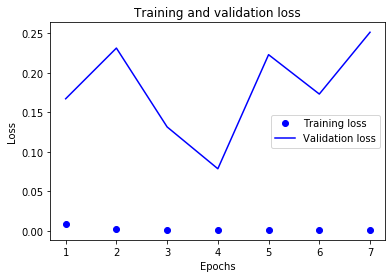

In [35]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

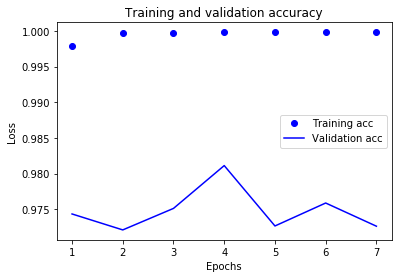

In [36]:
acc_values = hist.history['accuracy']
val_acc_values = hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Predicting the Model</h2>

In [37]:
model2_pred= model2.predict_classes(scaled_X_test)

In [38]:
transpose_model2=numpy.transpose([enc_y_test, model2_pred])

In [39]:
transpose_model2

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

<h2>Generating the Results </h2>

In [40]:
encoder.classes_

array(['attack', 'normal'], dtype=object)

In [41]:
target_names=[encoder.classes_[0], encoder.classes_[1]]

In [42]:
result_model2= classification_report(enc_y_test, model2_pred, target_names= target_names)

In [43]:
print(result_model2)

              precision    recall  f1-score   support

      attack       0.80      0.80      0.80     35288
      normal       0.98      0.98      0.98    277960

    accuracy                           0.96    313248
   macro avg       0.89      0.89      0.89    313248
weighted avg       0.96      0.96      0.96    313248



<h2>Reshaping to the array to 3-Dimensional array  </h2>

In [44]:
#Reshape input to be [samples, time steps, features] to work with LSTM

third_X_train = numpy.reshape(scaled_X_train, (scaled_X_train.shape[0], 1, scaled_X_train.shape[1]))
third_X_train.shape

(885744, 1, 76)

In [45]:
third_X_test = numpy.reshape(scaled_X_test,(scaled_X_test.shape[0], 1, scaled_X_test.shape[1]))
third_X_test.shape

(313248, 1, 76)

<h2>Using Recurrent Neural Network with LSTM </h2>

In [46]:
#Using multiple layer of LSTM
multi_lstm_model=Sequential()

multi_lstm_model.add(LSTM(50,input_shape=(1, third_X_train.shape[2]),
                    return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))

multi_lstm_model.add(LSTM(50, return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))


multi_lstm_model.add(Flatten())

multi_lstm_model.add(Dense(2, activation='sigmoid'))

multi_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

multi_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             25400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 45,702
Trainable params: 45,702
Non-trainable params: 0
__________________________________________________

In [47]:
history_lstm1=multi_lstm_model.fit(third_X_train, cat_y_train,batch_size=128,
               epochs=10, callbacks=[earlystop], validation_split=0.15, verbose=1)

Train on 752882 samples, validate on 132862 samples
Epoch 1/10
752882/752882 [==============================] - 29s 39us/step - loss: 0.0120 - accuracy: 0.9976 - val_loss: 0.0643 - val_accuracy: 0.9865
Epoch 2/10
752882/752882 [==============================] - 29s 38us/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0840 - val_accuracy: 0.9861
Epoch 3/10
752882/752882 [==============================] - 29s 39us/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0689 - val_accuracy: 0.9859
Epoch 4/10
752882/752882 [==============================] - 25s 33us/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.1050 - val_accuracy: 0.9843
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


In [48]:
lstm1_loss, lstm1_accuracy = multi_lstm_model.evaluate(third_X_test, cat_y_test)

313248/313248 [==============================] - 7s 21us/step


In [49]:
print('Loss :{loss},\nAccuracy of LSTM Model : {accuracy}'.format(loss=lstm1_loss,accuracy=lstm1_accuracy))

Loss :0.1910873664349137,
Accuracy of LSTM Model : 0.9601114988327026


<h2> Plotting the Training/Validation Loss and Accuracy</h2>

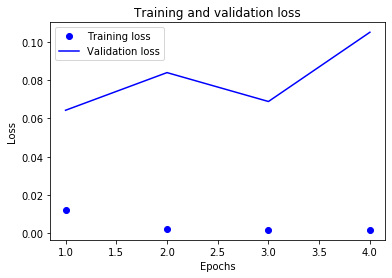

In [50]:
import matplotlib.pyplot as plt

acc = history_lstm1.history['accuracy']
val_acc = history_lstm1.history['val_accuracy']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss,  'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

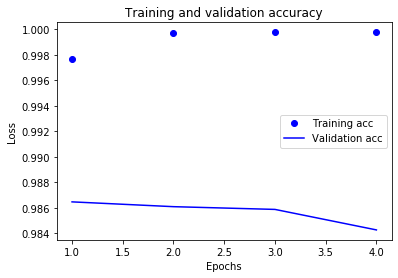

In [51]:
acc_values = history_lstm1.history['accuracy']
val_acc_values = history_lstm1.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Predicting the Model and Generating the Outcome </h2>

In [52]:
multi_lstm_preds=multi_lstm_model.predict_classes(third_X_test)


In [53]:
transpose=numpy.transpose([enc_y_test, multi_lstm_preds])

In [54]:
transpose

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [55]:
#From the below code we can observe the predicted and actual label
#come
outcome_range=100
for i in range(outcome_range):
    prediction = encoder.classes_[transpose[i,1]]
    actual = encoder.classes_[transpose[i,0]]
    print( "At line",i, "The model predicted :", prediction, ", When the Actual is :", actual)

At line 0 The model predicted : normal , When the Actual is : normal
At line 1 The model predicted : normal , When the Actual is : normal
At line 2 The model predicted : normal , When the Actual is : normal
At line 3 The model predicted : normal , When the Actual is : normal
At line 4 The model predicted : normal , When the Actual is : normal
At line 5 The model predicted : normal , When the Actual is : normal
At line 6 The model predicted : normal , When the Actual is : normal
At line 7 The model predicted : normal , When the Actual is : normal
At line 8 The model predicted : normal , When the Actual is : normal
At line 9 The model predicted : normal , When the Actual is : normal
At line 10 The model predicted : normal , When the Actual is : normal
At line 11 The model predicted : normal , When the Actual is : normal
At line 12 The model predicted : normal , When the Actual is : normal
At line 13 The model predicted : normal , When the Actual is : normal
At line 14 The model predicted

<h2>Generating Precision/Recall and F1-score Report </h2>

In [56]:
encoder.classes_

array(['attack', 'normal'], dtype=object)

In [57]:
target_names=[encoder.classes_[0], encoder.classes_[1]]

In [58]:
result_lstm1 = classification_report(enc_y_test, multi_lstm_preds, target_names=target_names)

In [59]:
print(result_lstm1)
#USING LSTM With more layer and neuron, we may get better result

              precision    recall  f1-score   support

      attack       0.81      0.84      0.83     35288
      normal       0.98      0.98      0.98    277960

    accuracy                           0.96    313248
   macro avg       0.90      0.91      0.90    313248
weighted avg       0.96      0.96      0.96    313248

